In [34]:
#Importing relavent modules
#https://www.sec.gov/data-research/sec-markets-data/financial-statement-data-sets
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
q1_num = pd.read_csv("Q1/num.csv", sep="\t")
q1_sub = pd.read_csv("Q1/sub.csv", sep="\t")
q1_tag = pd.read_csv("Q1/tag.csv", sep="\t")
q1_pre = pd.read_csv("Q1/pre.csv", sep="\t")

In [3]:
q2_num = pd.read_csv("Q2/num.csv", sep="\t")
q2_sub = pd.read_csv("Q2/sub.csv", sep="\t")
q2_tag = pd.read_csv("Q2/tag.csv", sep="\t")
q2_pre = pd.read_csv("Q2/pre.csv", sep="\t")
sic = pd.read_csv("AD/sic_name.csv", sep="\t")

In [4]:
q2_sub[q2_sub["name"].str.contains("JP", case=False)]

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
5272,0000019617-25-000421,19617,JPMORGAN CHASE & CO,6021.0,US,NY,NEW YORK,10017,383 MADISON AVENUE,NaN,...,20250331.0,2025.0,Q1,20250501,2025-05-01 16:17:00.0,0,1,jpm-20250331_htm.xml,1,NaN


In [16]:
#Competitive Benchmarking
competitors = q2_sub["adsh"][q2_sub["sic"] == 6021.0].unique()

In [71]:
# Merge q2_num with q2_sub on "adsh" so we have values + names aligned
merged = q2_num.merge(q2_sub[["adsh", "name"]], on="adsh", how="left")

# Filter to only competitor adsh
filtered = merged[merged["adsh"].isin(competitors)]

# Aggregate revenue per competitor
gross_rev = (
    filtered.groupby(["adsh", "name"])["value"]
    .sum()
    .reset_index()
    .rename(columns={"value": "rev"})
)

,adsh,name,rev
0,0000018349-25-000078,SYNOVUS FINANCIAL CORP,2.008413e+12
1,0000019617-25-000421,JPMORGAN CHASE & CO,1.198048e+14
2,0000028412-25-000154,COMERICA INC /NEW/,2.260239e+12
3,0000036104-25-000028,US BANCORP DE,1.754398e+13
4,0000036966-25-000053,FIRST HORIZON CORP,3.304053e+12


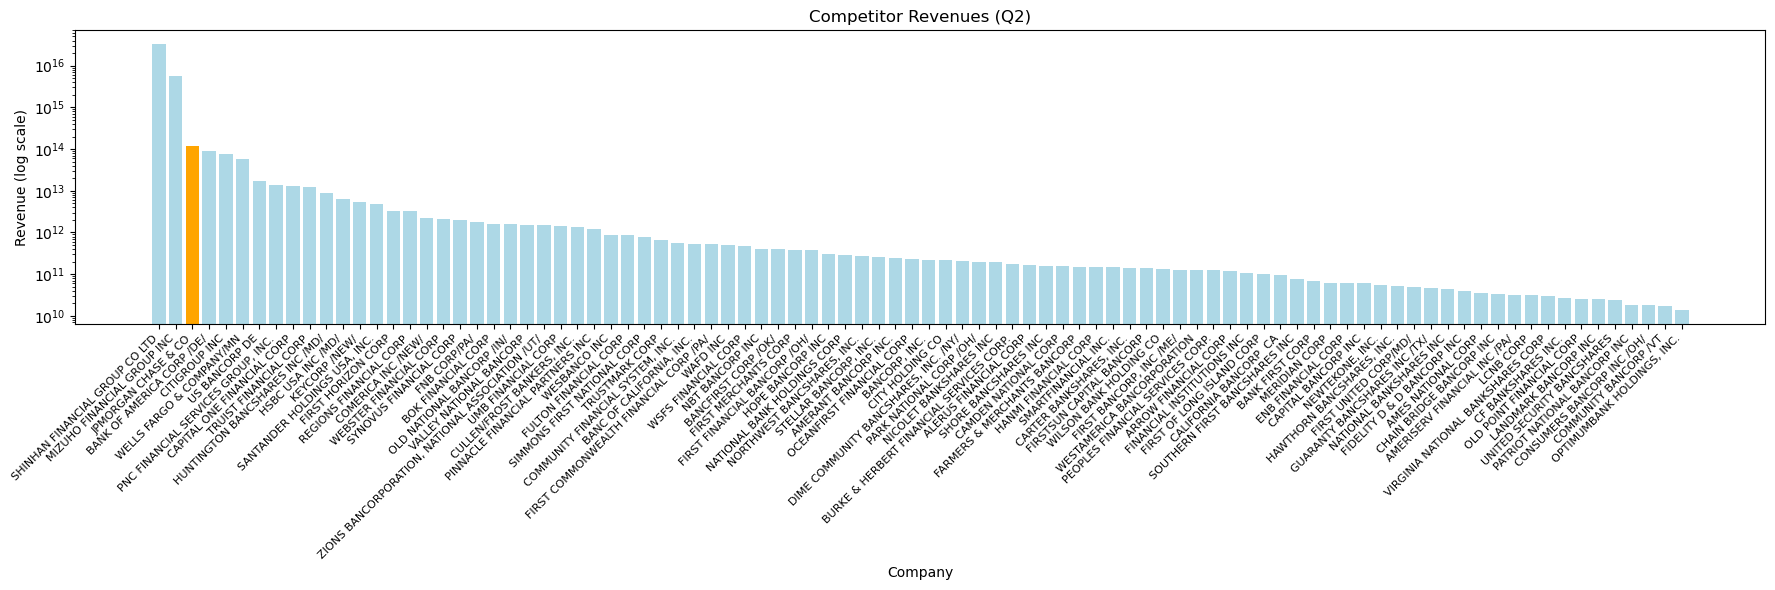

In [101]:
import matplotlib.pyplot as plt

highlight = "JPMORGAN CHASE & CO"

colors = [
    "orange" if name == highlight else "lightblue"
    for name in gross_rev["name"]
]

# Bar chart with log scale on y-axis
plt.figure(figsize=(18,6))
plt.bar(gross_rev["name"], gross_rev["rev"], color=colors)

plt.yscale("log")  # apply log scale
plt.xlabel("Company")
plt.ylabel("Revenue (log scale)")
plt.title("Competitor Revenues (Q2)")

plt.xticks(rotation=45, ha="right", fontsize=8)  # rotate labels for readability
plt.tight_layout()
plt.show()


In [85]:
gross_rev = gross_rev.sort_values("rev", ascending=False).reset_index(drop=True)

gross_rev.head

,adsh,name,rev
0,0001193125-25-089950,SHINHAN FINANCIAL GROUP CO LTD,3.364584e+16
1,0001193125-25-146101,MIZUHO FINANCIAL GROUP INC,5.629441e+15
2,0000019617-25-000421,JPMORGAN CHASE & CO,1.198048e+14
3,0000070858-25-000200,BANK OF AMERICA CORP /DE/,8.883598e+13
4,0000831001-25-000086,CITIGROUP INC,7.512333e+13
